In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# Carregando Dados
athlete_df = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
regions_df = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')



In [42]:
# Exibe as primeiras 5 linhas do DataFrame
print(athlete_df.head())

# Resumo estatístico dos dados numéricos
print(athlete_df.describe())

# Verificar se há valores ausentes
print(athlete_df.isnull().sum())


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [43]:
# Exibe as primeiras 5 linhas do DataFrame
print(regions_df.head())

# Resumo estatístico dos dados numéricos
print(regions_df.describe())

# Verificar se há valores ausentes
print(regions_df.isnull().sum())


   NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN
        NOC   region                 notes
count   230      227                    21
unique  230      206                    21
top     AFG  Germany  Netherlands Antilles
freq      1        4                     1
NOC         0
region      3
notes     209
dtype: int64


In [44]:
# Inspecionar as primeiras linhas dos arquivos
print(athlete_df.head())
print(regions_df.head())

# Verificar as colunas de cada DataFrame
print(athlete_df.columns)
print(regions_df.columns)


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [45]:
# Combinar os dataframes
df_combined = pd.merge(athlete_df, regions_df, on='NOC')

# Inspecionar o DataFrame combinado
print(df_combined.head())


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightwei

In [46]:
# Resumo estatístico
print(df_combined.describe())


                  ID            Age         Height         Weight  \
count  270767.000000  261305.000000  210684.000000  207982.000000   
mean    68229.276832      25.559783     175.344250      70.709523   
std     39017.998824       6.392501      10.519556      14.350094   
min         1.000000      10.000000     127.000000      25.000000   
25%     34630.500000      21.000000     168.000000      60.000000   
50%     68187.000000      24.000000     175.000000      70.000000   
75%    102065.500000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  270767.000000  
mean     1978.362297  
std        29.884637  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


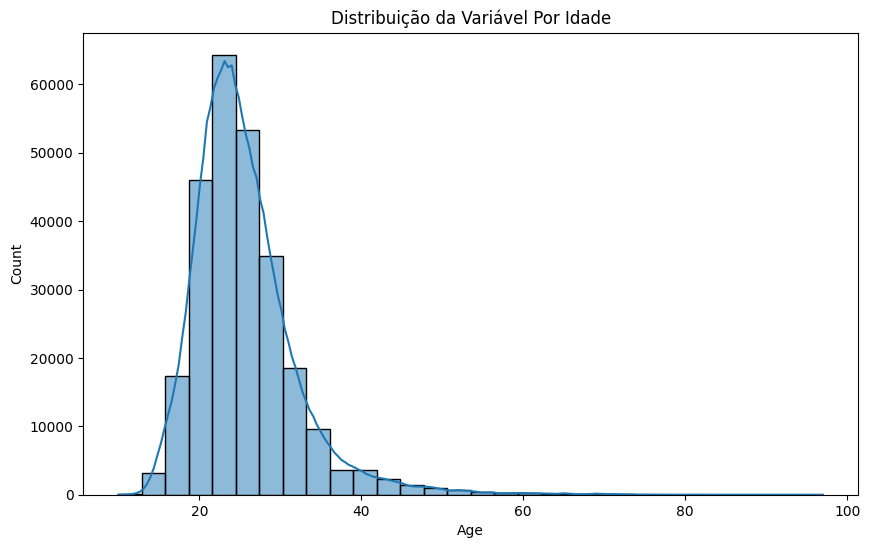

In [47]:


# Converter infinitos para NaN
df_combined.replace([np.inf, -np.inf], np.nan, inplace=True)

# Visualização de distribuição
plt.figure(figsize=(10,6))
sns.histplot(df_combined['Age'], bins=30, kde=True)
plt.title('Distribuição da Variável Por Idade')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


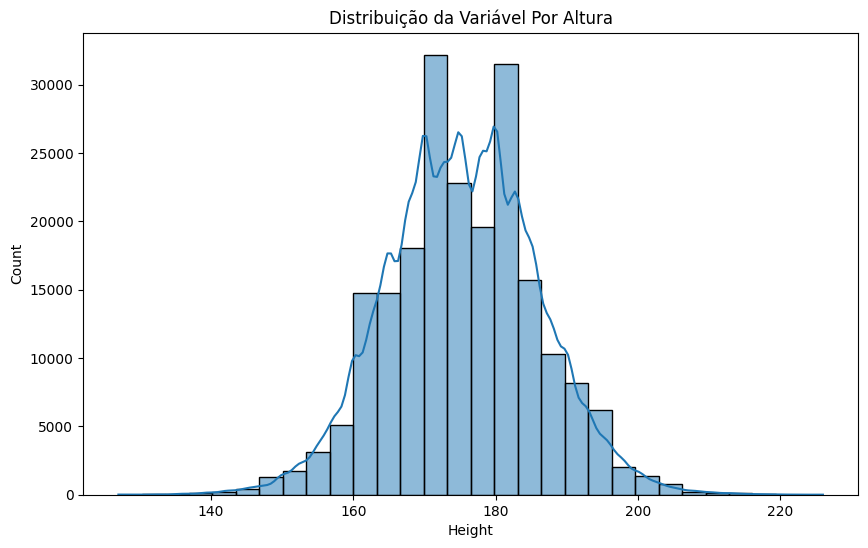

In [48]:
# Visualização de distribuição
plt.figure(figsize=(10,6))
sns.histplot(df_combined['Height'], bins=30, kde=True)
plt.title('Distribuição da Variável Por Altura')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


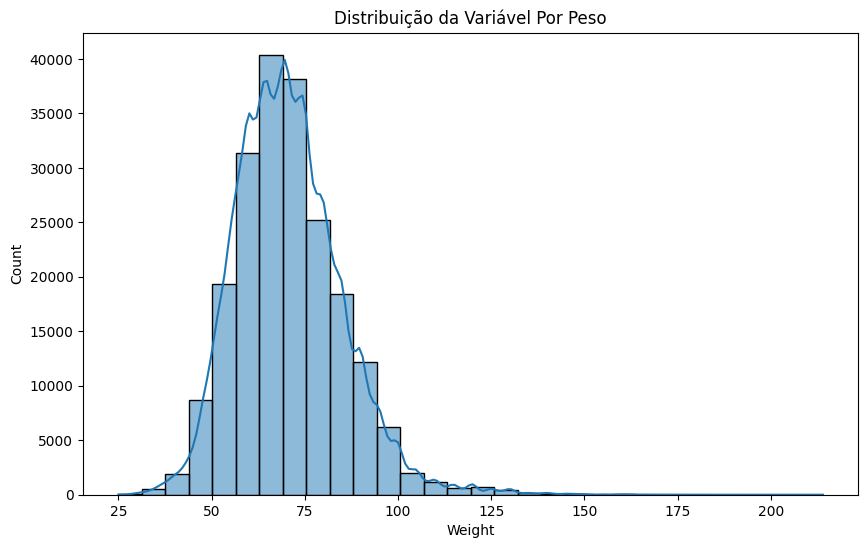

In [49]:
# Visualização de distribuição
plt.figure(figsize=(10,6))
sns.histplot(df_combined['Weight'], bins=30, kde=True)
plt.title('Distribuição da Variável Por Peso')
plt.show()

In [50]:
# Selecionar apenas colunas numéricas
df_numerico = df_combined.select_dtypes(include=[np.number])



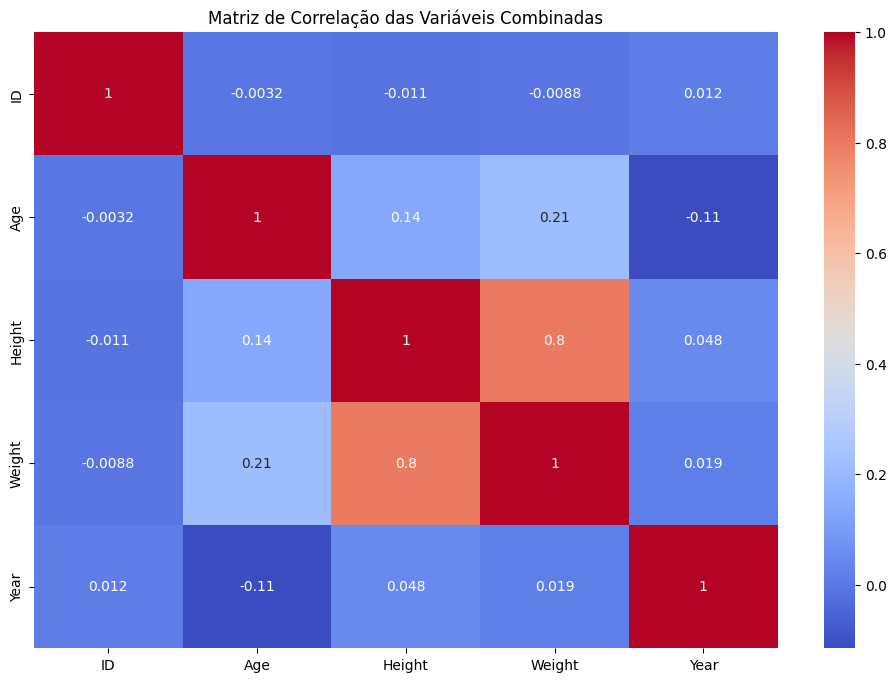

In [51]:
# Análise de Correlação
plt.figure(figsize=(12,8))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Combinadas')
plt.show()


In [52]:
# Média de 'variavel_y' agrupada por 'variavel_x'
media_por_grupo = df_combined.groupby('Height')['Weight'].mean()
print(media_por_grupo)


Height
127.0     44.857143
128.0     74.000000
130.0     59.000000
131.0     41.000000
132.0     39.777778
            ...    
219.0    108.500000
220.0    122.833333
221.0    124.500000
223.0    117.000000
226.0    141.000000
Name: Weight, Length: 95, dtype: float64


In [53]:
# Calcular o IMC

df['Height_M'] = df_combined['Height']/100
df['IMC'] = df_combined['Weight'] / (df['Height_M'] ** 2)

                            
    # Classificar o IMC
def classificar_imc(imc):
    if imc < 18.5:
        return "Abaixo do Peso"
    elif 18.5 <= imc < 24.9:
        return "Peso Normal"
    elif 25 <= imc < 29.9:
        return "Sobrepeso"
    else:
        return "Obesidade"

df['Classificação IMC'] = df['IMC'].apply(classificar_imc)

# Ver o resultado
print(df_combined[['Weight', 'Height']].head())
print(df['Classificação IMC'])

   Weight  Height
0    80.0   180.0
1    60.0   170.0
2     NaN     NaN
3     NaN     NaN
4    82.0   185.0
0      Peso Normal
1      Peso Normal
2        Obesidade
3        Obesidade
4      Peso Normal
          ...     
225      Sobrepeso
226      Sobrepeso
227      Sobrepeso
228      Sobrepeso
229    Peso Normal
Name: Classificação IMC, Length: 230, dtype: object


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


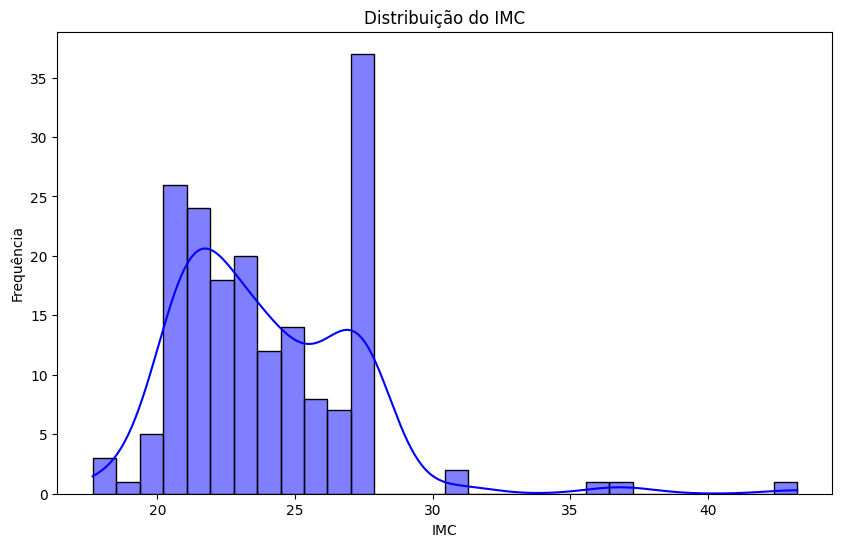

In [54]:
#Histograma de distribuição de IMC

plt.figure(figsize=(10, 6))
sns.histplot(df['IMC'], bins=30, kde=True, color='blue')
plt.title('Distribuição do IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.show()


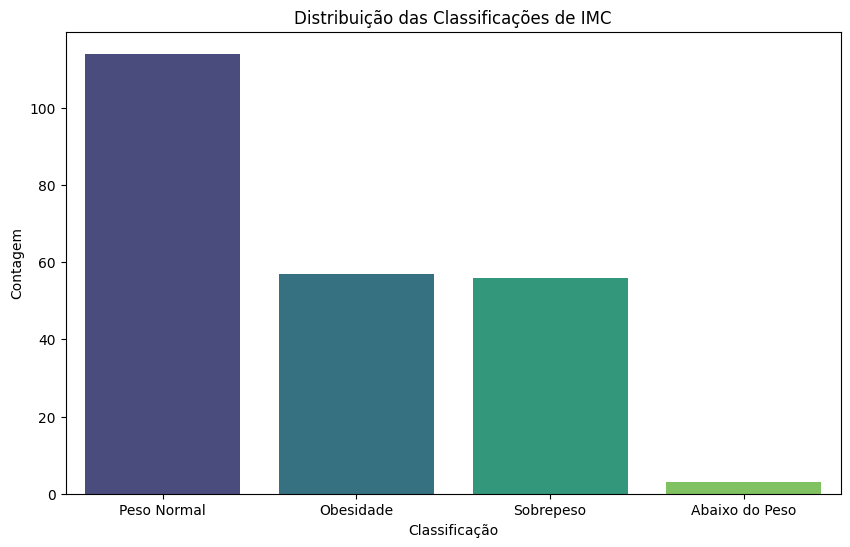

In [55]:
#Gráfico de barras para classificação de IMC

plt.figure(figsize=(10, 6))
sns.countplot(x='Classificação IMC', data=df, palette='viridis')
plt.title('Distribuição das Classificações de IMC')
plt.xlabel('Classificação')
plt.ylabel('Contagem')
plt.show()

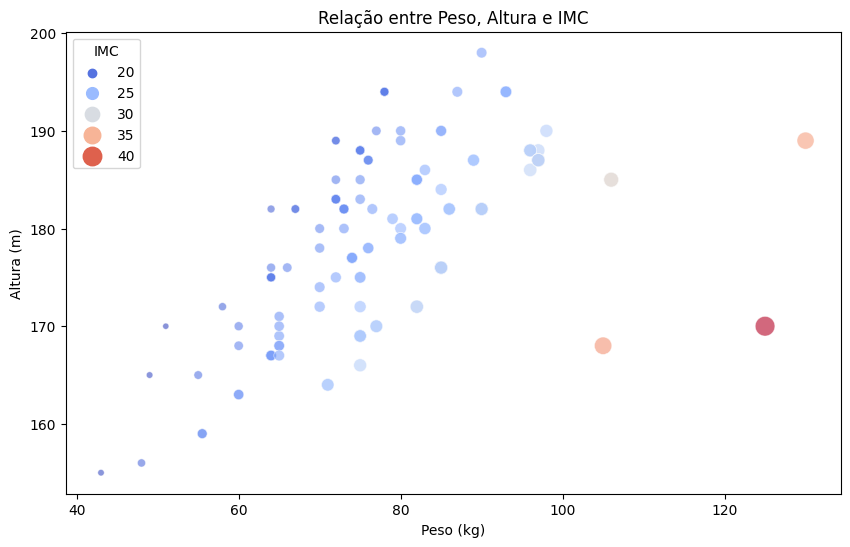

In [56]:
#IMC em relação a peso e altura

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Height', hue= df['IMC'], size=df['IMC'], sizes=(20, 200), data=df_combined, palette='coolwarm', alpha=0.6)
plt.title('Relação entre Peso, Altura e IMC')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (m)')
plt.show()